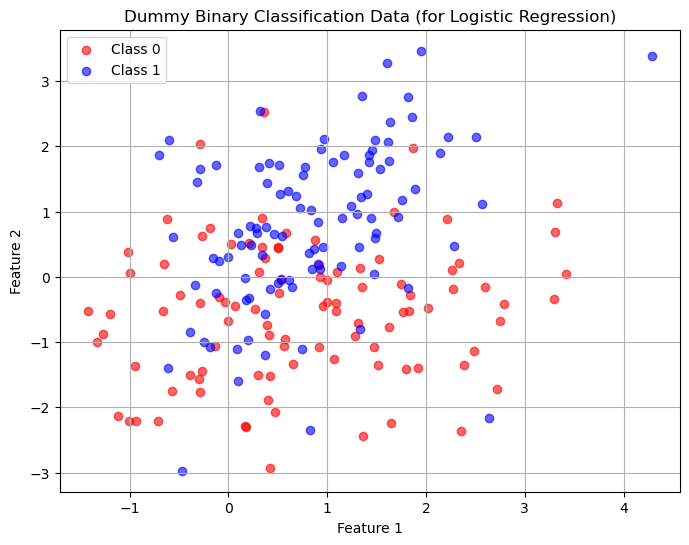

Features shape: (200, 2)
Target shape: (200,)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import math

# Set seed
np.random.seed(42)

# Generate a classification dataset
x, y = make_classification(
    n_samples=200,
    n_features=2,          # Only 2 useful features for visualization
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.8,         # Low separation makes it harder
    flip_y=0.1,            # Add noise (10% label flipping)
    random_state=42
)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color="red", label="Class 0", alpha=0.6)
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color="blue", label="Class 1", alpha=0.6)
plt.title("Dummy Binary Classification Data (for Logistic Regression)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

print("Features shape:", x.shape)
print("Target shape:", y.shape)

(200, 1) (200, 1)
(200, 9)
[[-1.71152746]
 [ 4.9374208 ]
 [-3.57868592]
 [ 1.25306081]
 [ 2.09059232]
 [ 1.12981706]
 [-1.74474381]
 [ 1.12981706]
 [-0.48375596]]
0.7328184695033764
0.4887215484909797


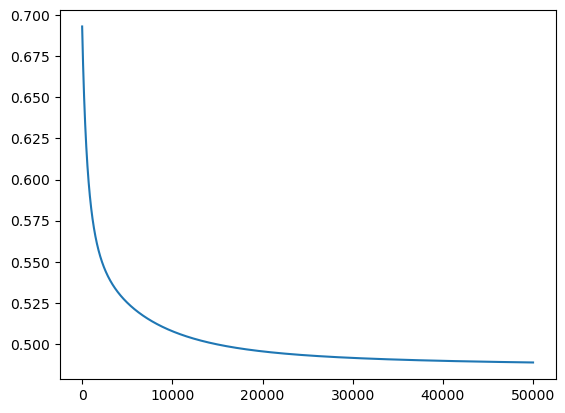

In [22]:
x_mean = np.mean(x)
x_std = np.std(x)
x = (x-x_mean)/x_std
y = y.reshape(-1,1)
x1 = x[:, 0].reshape(-1, 1)
x2 = x[:, 1].reshape(-1, 1)
# x1_mean = np.mean(x1)
# x1_std = np.std(x1)
# x1 = (x1-x1_mean)/x1_std

# x2_mean = np.mean(x2)
# x2_std = np.std(x2)
# x2 = (x2-x2_mean)/x2_std
print(x1.shape,x2.shape)
x1_2 = x1**2
x2_2 = x2**2
x3 = x1*x2
x1_3 = x1**3
x2_3 = x2**3
x1_x2_2 = x1*(x1**2)
x1_2_x2 = x2*(x1**2)
x = np.hstack((x1, x2, x1_2, x2_2, x3,x1_3,x2_3,x1_x2_2,x1_2_x2))
print(x.shape)
m = x.shape[0]
w = np.array([[0],[0],[0],[0],[0],[0],[0],[0],[0]])
b=0
iteration = 50000
cost =[]
alpha = 0.02
for i in range(iteration):
    z = x@w+b
    y_pred = 1/(1+np.exp(-z))
    cst = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    cost.append(cst)
    w= w- alpha*(1/m)*(x.T@(y_pred-y))
    b = b-alpha*(1/m)*np.sum(y_pred-y)

print(w)
print(b)
print(cost[-1])
plt.plot(cost)
plt.show()



(200, 1) (200, 1)
(200, 9)
[[-1.91611218e-01]
 [ 1.11663016e+00]
 [-5.66602117e-01]
 [ 2.48453091e-01]
 [ 2.69373808e-01]
 [ 3.79056559e-02]
 [ 3.04128939e-04]
 [ 3.79056559e-02]
 [ 2.05863241e-02]]
0.2768103862573963
0.5006048448269271


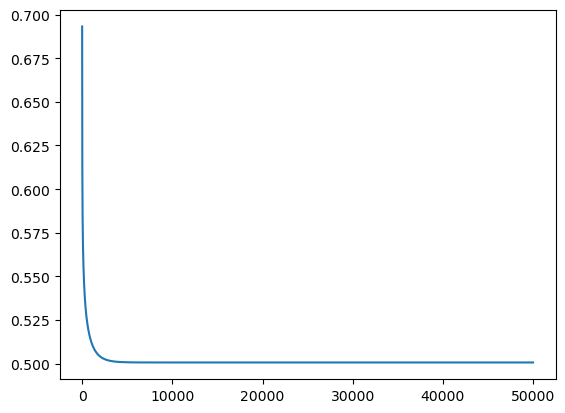

In [21]:
#using regularization
y = y.reshape(-1,1)
x1 = x[:, 0].reshape(-1, 1)
x2 = x[:, 1].reshape(-1, 1)
x1_mean = np.mean(x1)
x1_std = np.std(x1)
x1 = (x1-x1_mean)/x1_std

x2_mean = np.mean(x2)
x2_std = np.std(x2)
x2 = (x2-x2_mean)/x2_std
print(x1.shape,x2.shape)
x1_2 = x1**2
x2_2 = x2**2
x3 = x1*x2
x1_3 = x1**3
x2_3 = x2**3
x1_x2_2 = x1*(x1**2)
x1_2_x2 = x2*(x1**2)
x = np.hstack((x1, x2, x1_2, x2_2, x3,x1_3,x2_3,x1_x2_2,x1_2_x2))
print(x.shape)
m = x.shape[0]
w = np.array([[0],[0],[0],[0],[0],[0],[0],[0],[0]])
b=0
iteration = 50000
cost =[]
alpha = 0.02
lambd = 0.1
for i in range(iteration):
    z = x@w+b
    y_pred = 1/(1+np.exp(-z))
    cst = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) 
    cst = cst + (lambd / (2 * m)) * np.sum(w ** 2)
    cost.append(cst)
    w= w- (alpha*(1/m)*(x.T@(y_pred-y)) + (lambd / m) * w)
    b = b-alpha*(1/m)*np.sum(y_pred-y)

print(w)
print(b)
print(cost[-1])
plt.plot(cost)
plt.show()



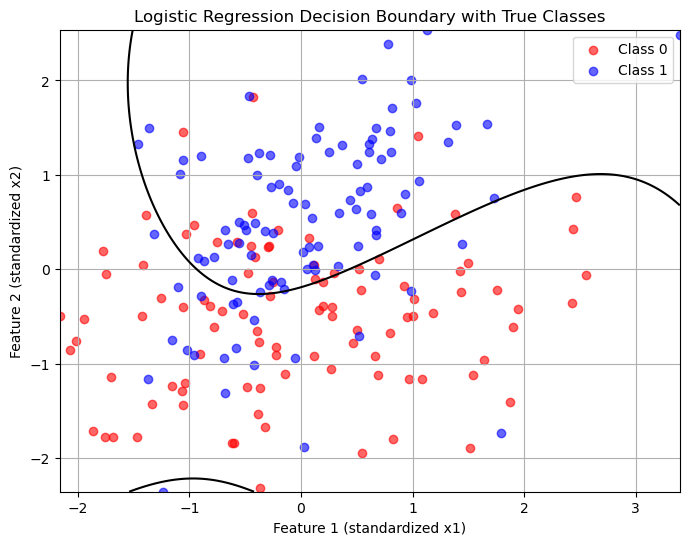

In [17]:

# 1. Plot the original data using true labels
plt.figure(figsize=(8, 6))
y = y.flatten()
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color="red", label="Class 0", alpha=0.6)
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color="blue", label="Class 1", alpha=0.6)

# 2. Create a meshgrid over the feature space
x1_min, x1_max = x1.min(), x1.max()
x2_min, x2_max = x2.min(), x2.max()
x1_vals = np.linspace(x1_min, x1_max, 300)
x2_vals = np.linspace(x2_min, x2_max, 300)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# 3. Flatten and generate the same polynomial features as during training
x1_flat = X1.ravel().reshape(-1, 1)
x2_flat = X2.ravel().reshape(-1, 1)
x1_2 = x1_flat ** 2
x2_2 = x2_flat ** 2
x3 = x1_flat * x2_flat
x1_3 = x1_flat ** 3
x2_3 = x2_flat ** 3
x1_x2_2 = x1_flat * (x1_flat ** 2)
x1_2_x2 = x2_flat * (x1_flat ** 2)
X_grid = np.hstack((x1_flat, x2_flat, x1_2, x2_2, x3, x1_3, x2_3, x1_x2_2, x1_2_x2))

# 4. Predict probabilities on the grid
z_grid = X_grid @ w + b
y_grid_pred = 1 / (1 + np.exp(-z_grid))
y_grid_pred = y_grid_pred.reshape(X1.shape)

# 5. Plot the decision boundary
plt.contour(X1, X2, y_grid_pred, levels=[0.5], colors='black')

# 6. Plot formatting
plt.title("Logistic Regression Decision Boundary with True Classes")
plt.xlabel("Feature 1 (standardized x1)")
plt.ylabel("Feature 2 (standardized x2)")
plt.legend()
plt.grid(True)
plt.show()


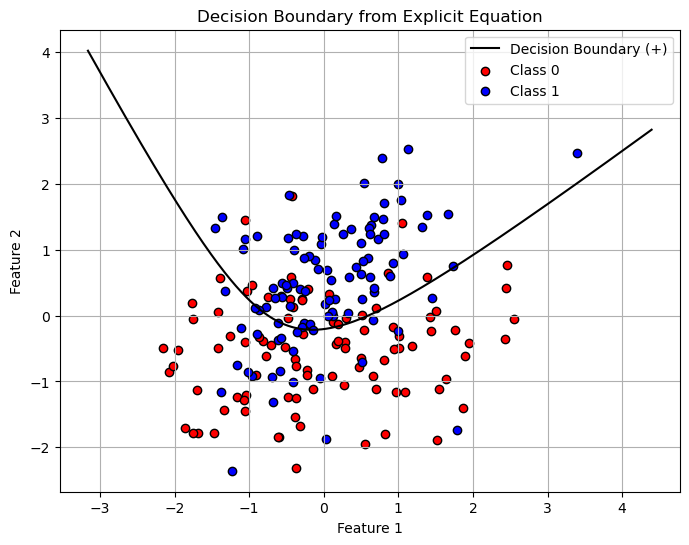

In [29]:
# Extract weights
w1, w2, w3, w4, w5 = w.flatten()
b_val = b

# Range of x1
x1_vals = np.linspace(x1.min() - 1, x1.max() + 1, 500)
x2_vals_upper = []

# Compute corresponding x2 from quadratic formula
for x1_i in x1_vals:
    A = w4
    B = w2 + w5 * x1_i
    C = w1 * x1_i + w3 * x1_i**2 + b_val

    # Discriminant
    D = B**2 - 4 * A * C

    if D >= 0:
        sqrt_D = np.sqrt(D)
        x2_sol1 = (-B + sqrt_D) / (2 * A)
        x2_vals_upper.append(x2_sol1)
    else:
        x2_vals_upper.append(np.nan)

# Convert to arrays
x2_vals_upper = np.array(x2_vals_upper)

# Plot
plt.figure(figsize=(8, 6))

# Decision boundary
plt.plot(x1_vals, x2_vals_upper, color='black', label='Decision Boundary (+)')

# Scatter data points
plt.scatter(x1[y.ravel() == 0], x2[y.ravel() == 0], color='red', label='Class 0', edgecolor='k')
plt.scatter(x1[y.ravel() == 1], x2[y.ravel() == 1], color='blue', label='Class 1', edgecolor='k')

plt.title("Decision Boundary from Explicit Equation")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


[[-0.22026874]
 [ 1.04885545]]
0.06867767226804693
0.5457773663957485


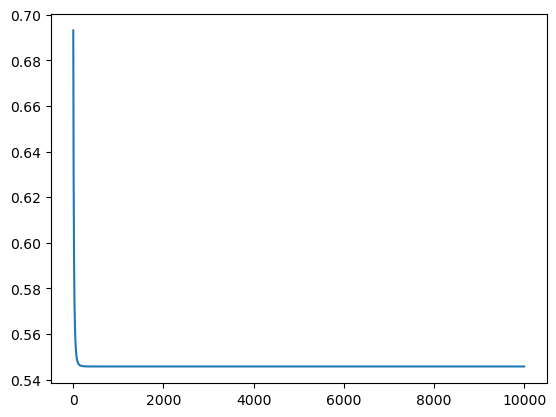

In [44]:
y = y.reshape(-1,1)
m = x.shape[0]
b=0
w = np.zeros((2,1))
alpha = 0.1
iteration = 10000
cost = []
for i in range(iteration):
    z = x @ w + b
    y_pred = 1 / (1 + np.exp(-z))
    cst = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    cost.append(cst)
    w= w- alpha*(1/m)*(x.T@(y_pred-y))
    b = b-alpha*(1/m)*np.sum(y_pred-y)

print(w)
print(b)

print(cost[-1])
plt.plot(cost)
plt.show()


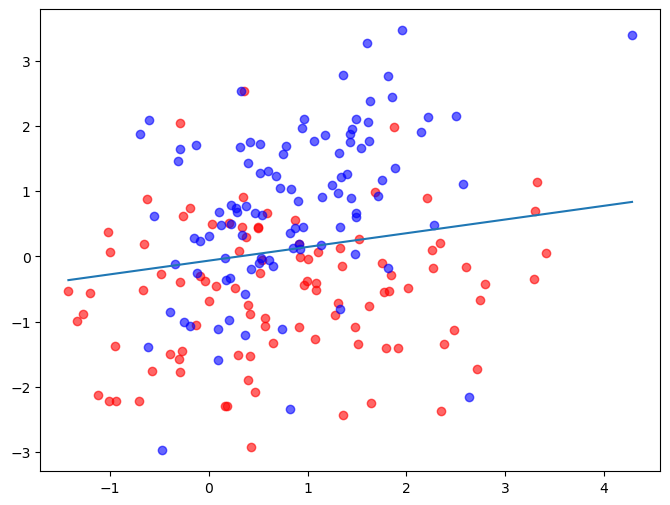

In [41]:
x1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
w1, w2 = w[0][0], w[1][0]
x2 = -(w1 * x1 + b) / w2
plt.figure(figsize=(8, 6))
plt.scatter(x[y[:, 0] == 0][:, 0], x[y[:, 0] == 0][:, 1], color='red', label='Class 0', alpha=0.6)
plt.scatter(x[y[:, 0] == 1][:, 0], x[y[:, 0] == 1][:, 1], color='blue', label='Class 1', alpha=0.6)
plt.plot(x1, x2)
plt.show()
